In [1]:
import pandas as pd
import numpy as np
# import and setup matplotlib
import matplotlib.pyplot as plt


#import seaborn as sns
#sns.set_theme(style="white")

plt.style.use('default')

%matplotlib inline

In [2]:
iris = pd.read_csv("iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:>

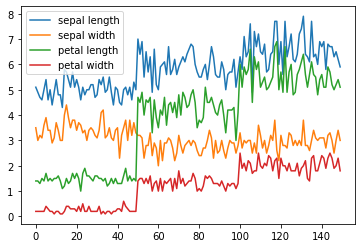

In [3]:
iris.plot()

array([[<AxesSubplot:title={'center':'Iris-setosa'}>,
        <AxesSubplot:title={'center':'Iris-versicolor'}>],
       [<AxesSubplot:title={'center':'Iris-virginica'}>, <AxesSubplot:>]],
      dtype=object)

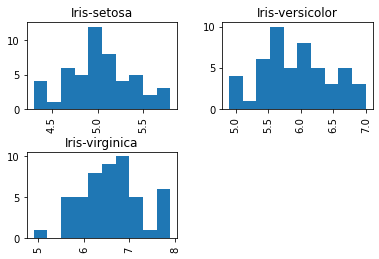

In [4]:
iris['sepal length'].hist(by=iris["class"])

array([[<AxesSubplot:title={'center':'Iris-setosa'}>,
        <AxesSubplot:title={'center':'Iris-versicolor'}>],
       [<AxesSubplot:title={'center':'Iris-virginica'}>, <AxesSubplot:>]],
      dtype=object)

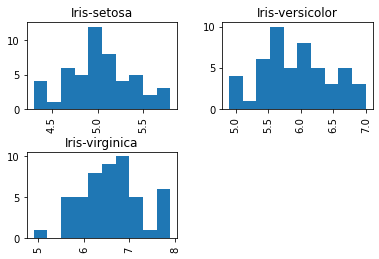

In [7]:
iris.hist(column="sepal length",by="class")

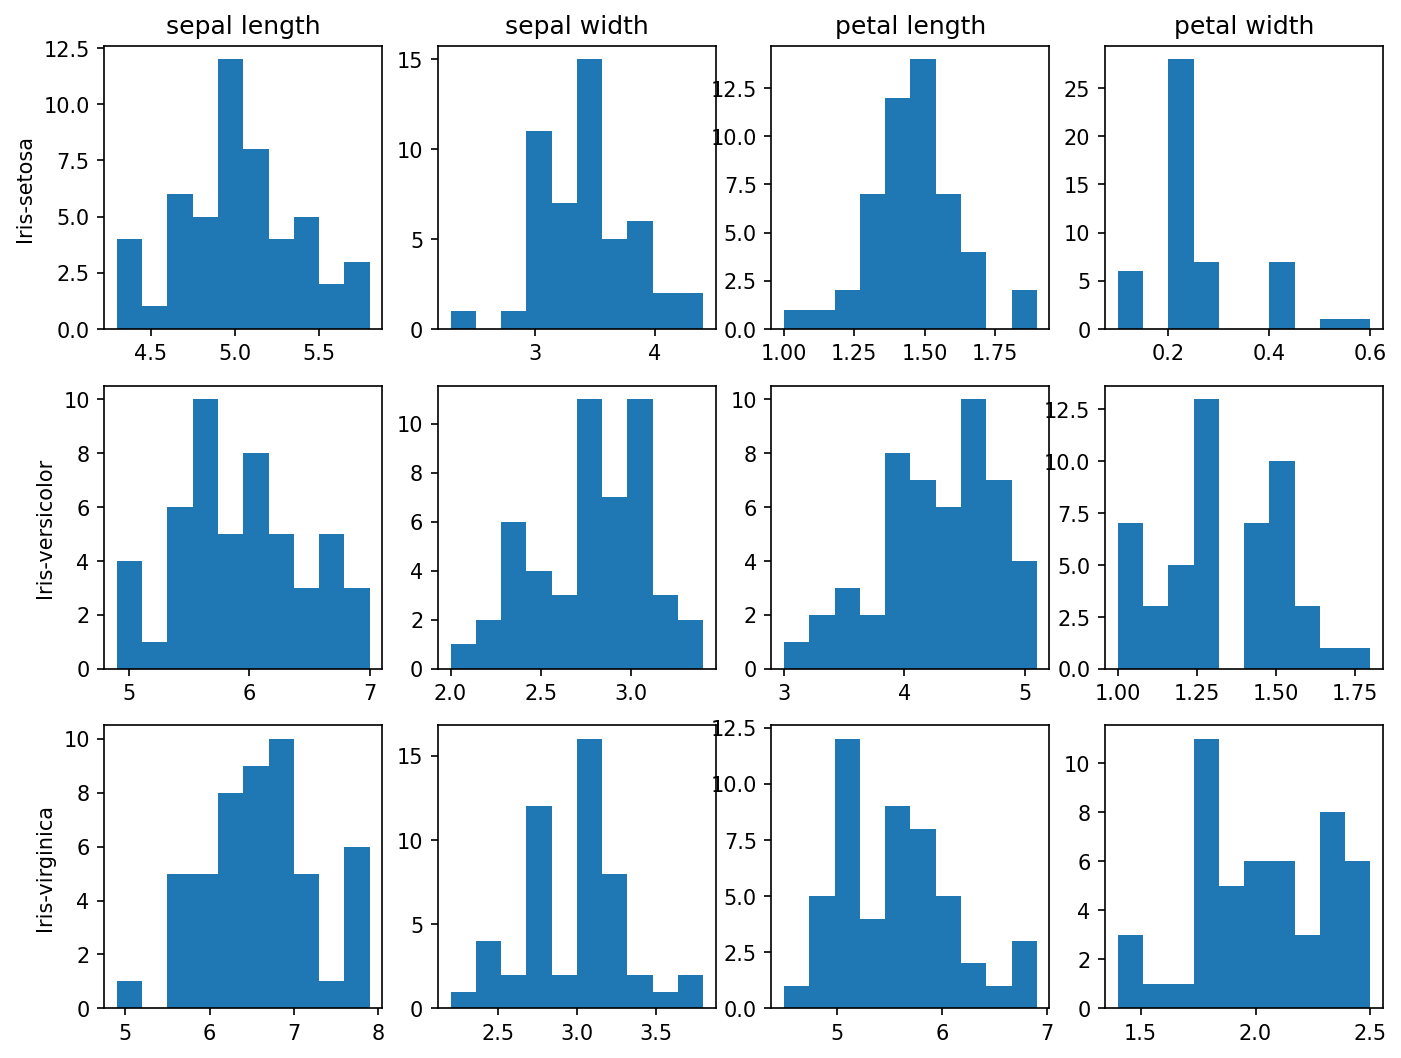

In [8]:
fig,ax=plt.subplots(3,4, figsize=(11,8.5), dpi=150)
for j,col in enumerate([v for v in iris if v != 'class']):
    for i, name in enumerate(iris['class'].unique()):
        ax[i,j].hist(iris.loc[iris["class"]==name,col])
    ax[0,j].set_title(col)

for i, name in enumerate(iris['class'].unique()):
    ax[i,0].set_ylabel(name)
fig.savefig("iris.png")

In [9]:
ax

array([[<AxesSubplot:title={'center':'sepal length'}, ylabel='Iris-setosa'>,
        <AxesSubplot:title={'center':'sepal width'}>,
        <AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>],
       [<AxesSubplot:ylabel='Iris-versicolor'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='Iris-virginica'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

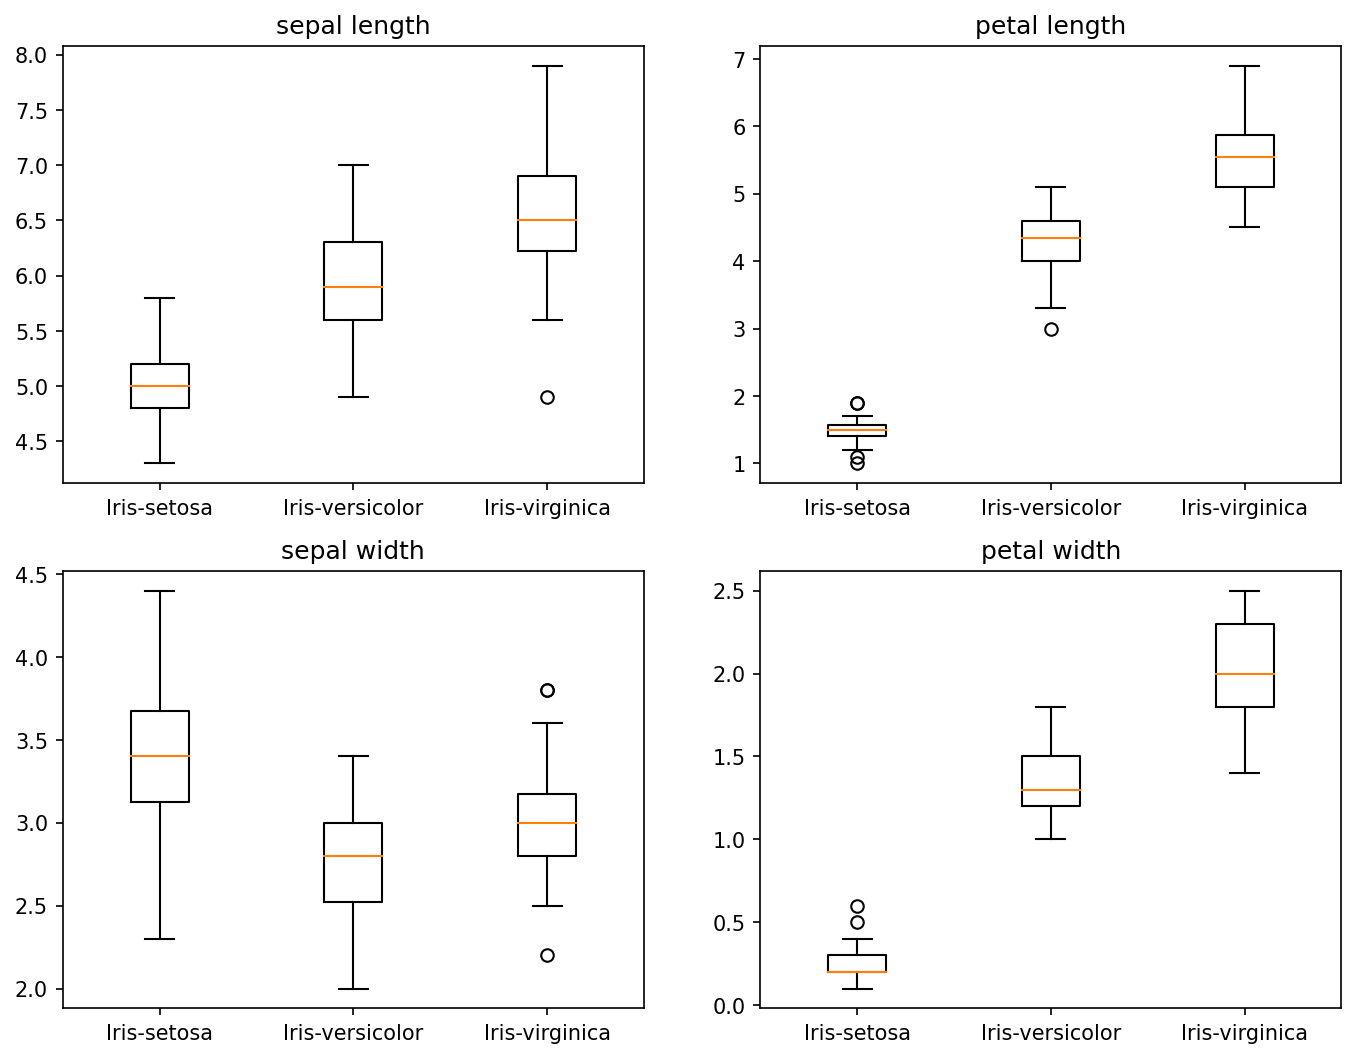

In [10]:
classes = iris['class'].unique()
fig,ax=plt.subplots(2,2, figsize=(11,8.5), dpi=150)

for j,col in enumerate([v for v in iris if v != 'class']):
    ax[j%2,j//2].boxplot(
        [iris.loc[iris['class']==name,col] for name in classes],
        labels=classes
    )
    ax[j%2,j//2].set_title(col)

In [11]:
import seaborn as sns
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


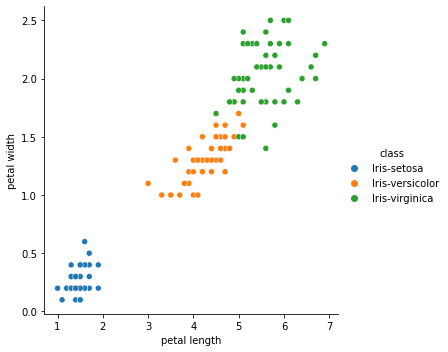

In [12]:
sns.relplot(
    data=iris,
    x="petal length",
    y="petal width",
    hue="class"
)

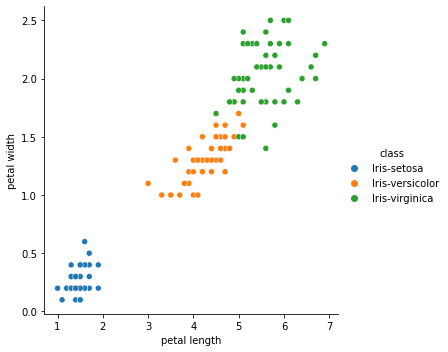

In [13]:
sns.relplot(
    data=iris,
    x="petal length",
    y="petal width",
    hue="class"
)

<AxesSubplot:ylabel='Count'>

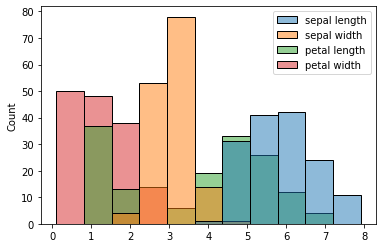

In [14]:
sns.histplot(
    data=iris,
)

In [15]:
iris.melt(id_vars=['class'])

,class,variable,value
0,Iris-setosa,sepal length,5.1
1,Iris-setosa,sepal length,4.9
2,Iris-setosa,sepal length,4.7
3,Iris-setosa,sepal length,4.6
4,Iris-setosa,sepal length,5.0
...,...,...,...
595,Iris-virginica,petal width,2.3
596,Iris-virginica,petal width,1.9
597,Iris-virginica,petal width,2.0
598,Iris-virginica,petal width,2.3


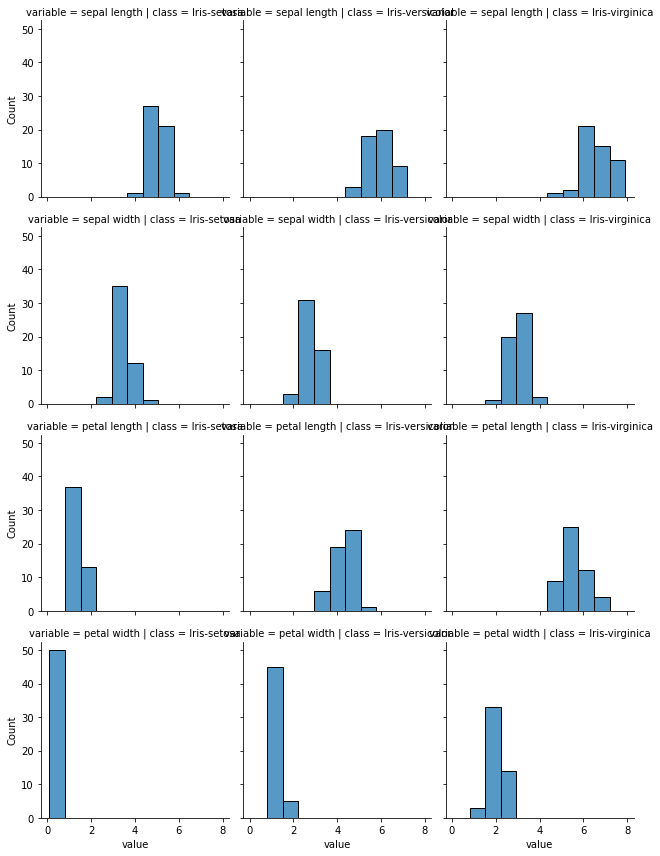

In [16]:
sns.displot(
    data=iris.melt(id_vars=['class']),
    x="value",
    col="class",
    row="variable",
    height=3,
)

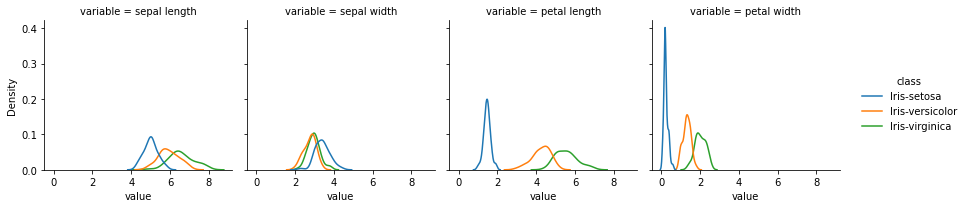

In [17]:
sns.displot(
    data=iris.melt(id_vars=['class']),
    x="value",
    hue="class",
    col="variable",
    height=3,#multiple="dodge",
    kind='kde'
)

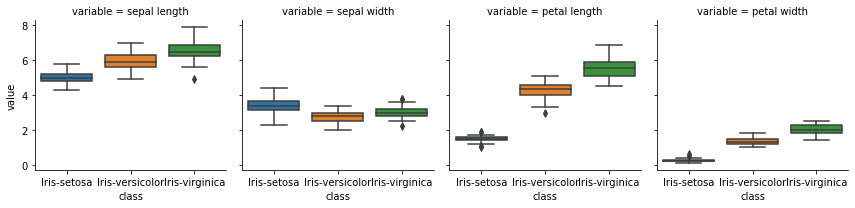

In [18]:
sns.catplot(
    data=iris.melt(id_vars=['class']),
    y="value",
    x="class",
    col="variable",
    height=3,#multiple="dodge",
    kind='box'
)

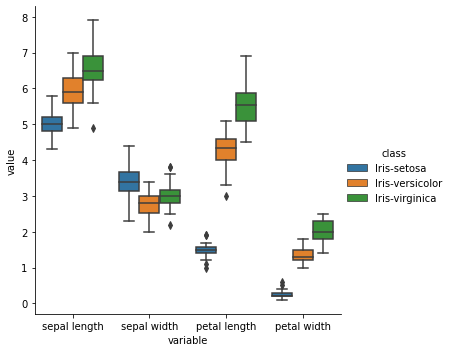

In [19]:
f=sns.catplot(
    data=iris.melt(id_vars=['class']),
    y="value",
    x="variable",
    hue="class",
    #col="",
    height=5,#multiple="dodge",
    kind='box'
)
f.savefig("iris2.svg")